<a href="https://colab.research.google.com/github/Christy04/Internshipstudio-ML-project/blob/master/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing required libraries**

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PowerTransformer 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report,confusion_matrix,recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score 

In [140]:
from google.colab import files
uploaded=files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (3).csv


In [141]:
import io
dataset=pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.csv']))

In [142]:
dataset.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [143]:
dataset.tail(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


**EDA**

In [144]:
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [145]:
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [146]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Here we can see that all the variables are numerical. But the columns 'CD Account', 'Online', 'Family', 'Education' , 'CreditCard' and 'Securities Account' are categorical variable which should be in 'category' type

In [147]:
experience = dataset['Experience']
age = dataset['Age']
correlation = experience.corr(age)
correlation

0.9942148569683321

The attributes 'Age' and 'Experience' are highly correalted.So it is better to drop Experience.

In [148]:
dataset.drop(["ID","Experience"],axis=1,inplace=True)

In [149]:
personal_loan=dataset['Personal Loan']
dataset.drop(['Personal Loan'],axis=1,inplace=True)
dataset['Personal Loan'] = personal_loan

The traget column is appended at the end of the dataframe.

In [150]:
r_count, c_count = dataset.shape
print('Total Number of rows :', r_count)
print('Total Number of columns :', c_count)

Total Number of rows : 5000
Total Number of columns : 12


In [151]:
dataset.isnull().values.any()

False

In [152]:
duplicate_rows = dataset[dataset.duplicated()]
print("Number of duplicate rows ", duplicate_rows)

Number of duplicate rows  Empty DataFrame
Columns: [Age, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Securities Account, CD Account, Online, CreditCard, Personal Loan]
Index: []


In [153]:
dataset=dataset.dropna()
dataset.count()

Age                   5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
Personal Loan         5000
dtype: int64

In [154]:
dataset.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
Personal Loan           2
dtype: int64

Zip Code has 467 distinct values. It's better to drop Zip Code since it is a nominal variable which has too many levels.

In [155]:
dataset.drop('ZIP Code',axis=1)

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,49,4,1.6,1,0,1,0,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,1,0,0
4996,30,15,4,0.4,1,85,0,0,1,0,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,1,0,0


In [156]:
dataset.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [157]:
(dataset.CCAvg ==0).sum()

106

In [158]:
dataset.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [159]:
(dataset.Mortgage == 0).sum()

3462

In [160]:
dataset['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [161]:
dataset['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [162]:
dataset.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [163]:
dataset['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

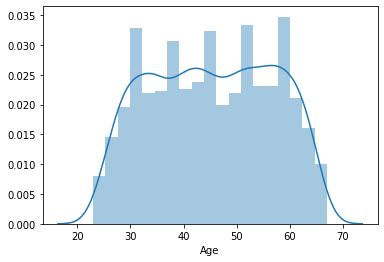

In [164]:
sns.distplot(dataset.Age);

Age is normally distributed

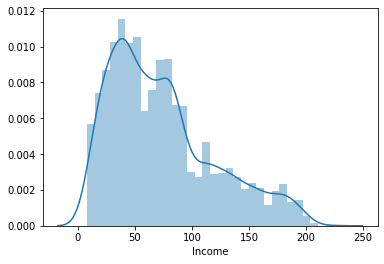

In [165]:
sns.distplot(dataset.Income);

The distribution is right skewed distribution because the tail goes to the right

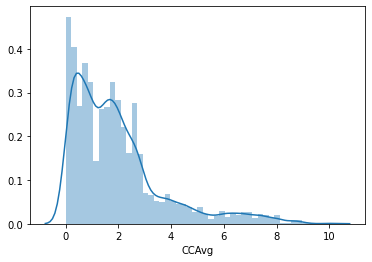

In [166]:
sns.distplot(dataset.CCAvg);

Most of the customers monthly avg. spending on credit cards is between 1k to 2.5K.


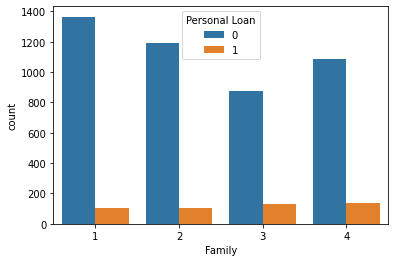

In [167]:
sns.countplot(x='Family',data=dataset,hue='Personal Loan')


 Family size does not have any impact in personal loan. But it seems families with size of 3 and 4 are more likely to take loan

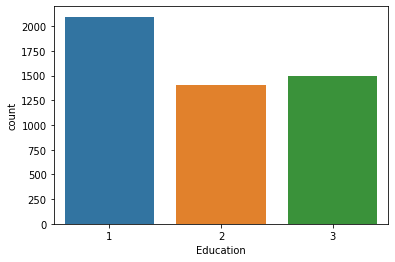

In [168]:
sns.countplot(dataset.Education);

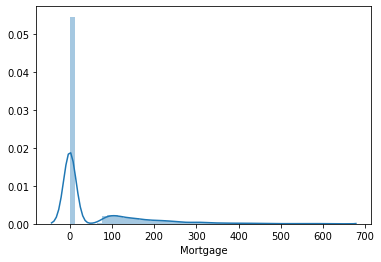

In [169]:
sns.distplot(dataset.Mortgage);

Mortage column seeems highly skewed

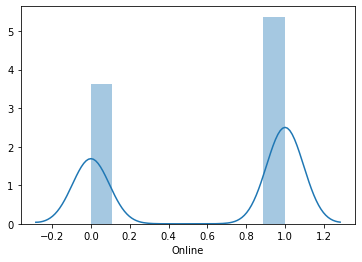

In [170]:
sns.distplot(dataset.Online);

customers who uses online transaction is more.

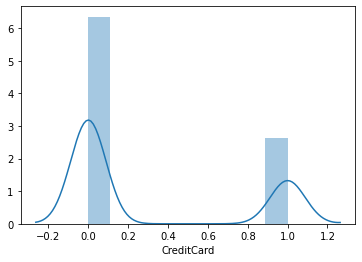

In [171]:
sns.distplot(dataset.CreditCard);

Customers who uses Credit Card is less.

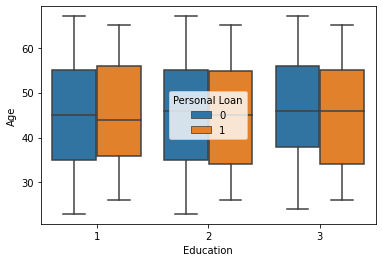

In [172]:
sns.boxplot(x='Education', y='Age', hue='Personal Loan', data = dataset)

Here,it seems no conclusion can be made,since persons who takes loan and those who didn't take loan seems equal.




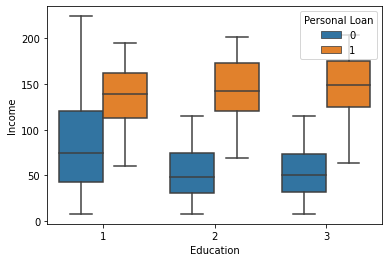

In [173]:
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data = dataset)

Here, customers with more income is granted loan across each educational category

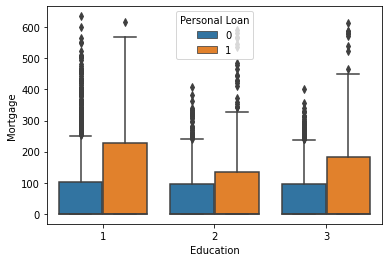

In [174]:
sns.boxplot(x='Education', y='Mortgage', hue='Personal Loan', data = dataset)

customers whose education level is 1 and did not take loan has higher mortgage than customers who take loan of same education level. Customers whose education level is 2and 3 and did not take loan has lesser mortgage than customers who take loan of same education level.

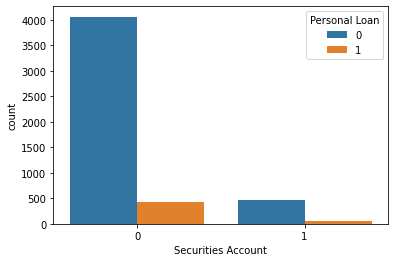

In [175]:
sns.countplot(x="Securities Account", data=dataset,hue="Personal Loan")

Here, majority of people having security accounts don't have personal loan

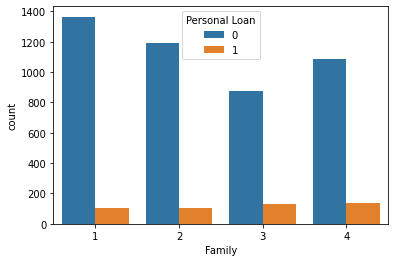

In [176]:
sns.countplot(x='Family',data=dataset ,hue='Personal Loan')

Family size does not have any impact in personal loan.

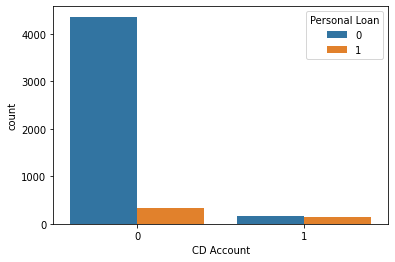

In [177]:
sns.countplot(x='CD Account',data=dataset, hue='Personal Loan')

Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

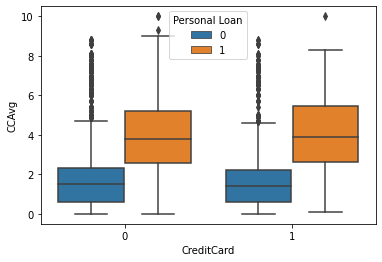

In [178]:
sns.boxplot(x="CreditCard", y='CCAvg', hue="Personal Loan", data=dataset)

Customers who have credit card and monthly spending is higher are more likely to take loan.

Text(0.5, 1.0, 'CCAvg Distribution')

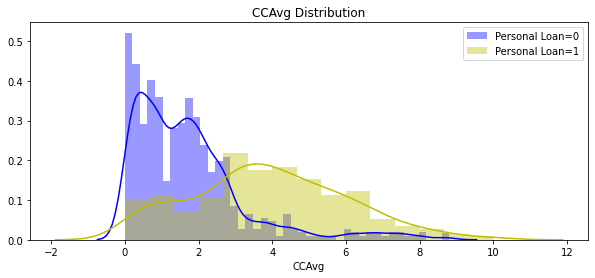

In [179]:
plt.figure(figsize=(10,4))
sns.distplot(dataset[dataset["Personal Loan"] == 0]['CCAvg'], color = 'b',label='Personal Loan=0')
sns.distplot(dataset[dataset["Personal Loan"] == 1]['CCAvg'], color = 'y',label='Personal Loan=1')
plt.legend()
plt.title("CCAvg Distribution")

Customers who have taken personal loan have higher credit card average than those who did not take loan. So high credit card average seems to be good predictor of whether or not a customer will take a personal loan.

Text(0.5, 1.0, 'Income Distribution')

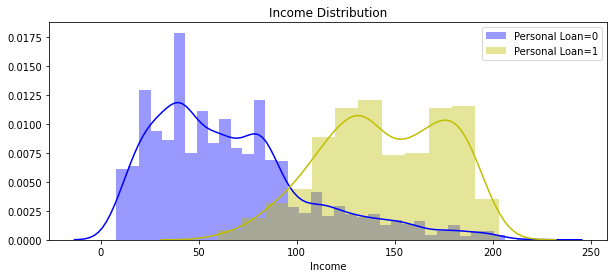

In [180]:
plt.figure(figsize=(10,4))
sns.distplot(dataset[dataset["Personal Loan"] == 0]['Income'], color = 'b',label='Personal Loan=0')
sns.distplot(dataset[dataset["Personal Loan"] == 1]['Income'], color = 'y',label='Personal Loan=1')
plt.legend()
plt.title("Income Distribution")

Customers who have taken personal loan have income than those who did not take. So high income seems to be good predictor of whether or not a customer will take a personal loan.

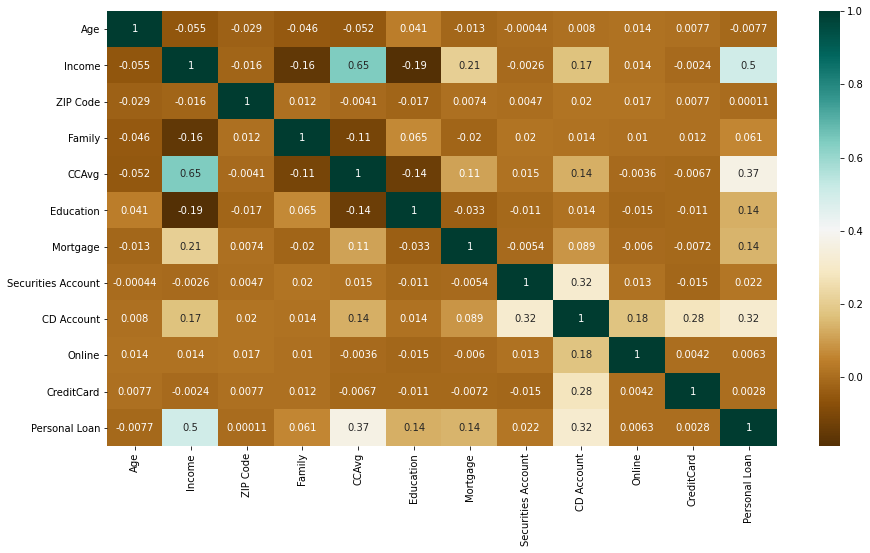

In [181]:
plt.figure(figsize = (15,8))
sns.heatmap(dataset.corr(), cmap='BrBG',annot=True)

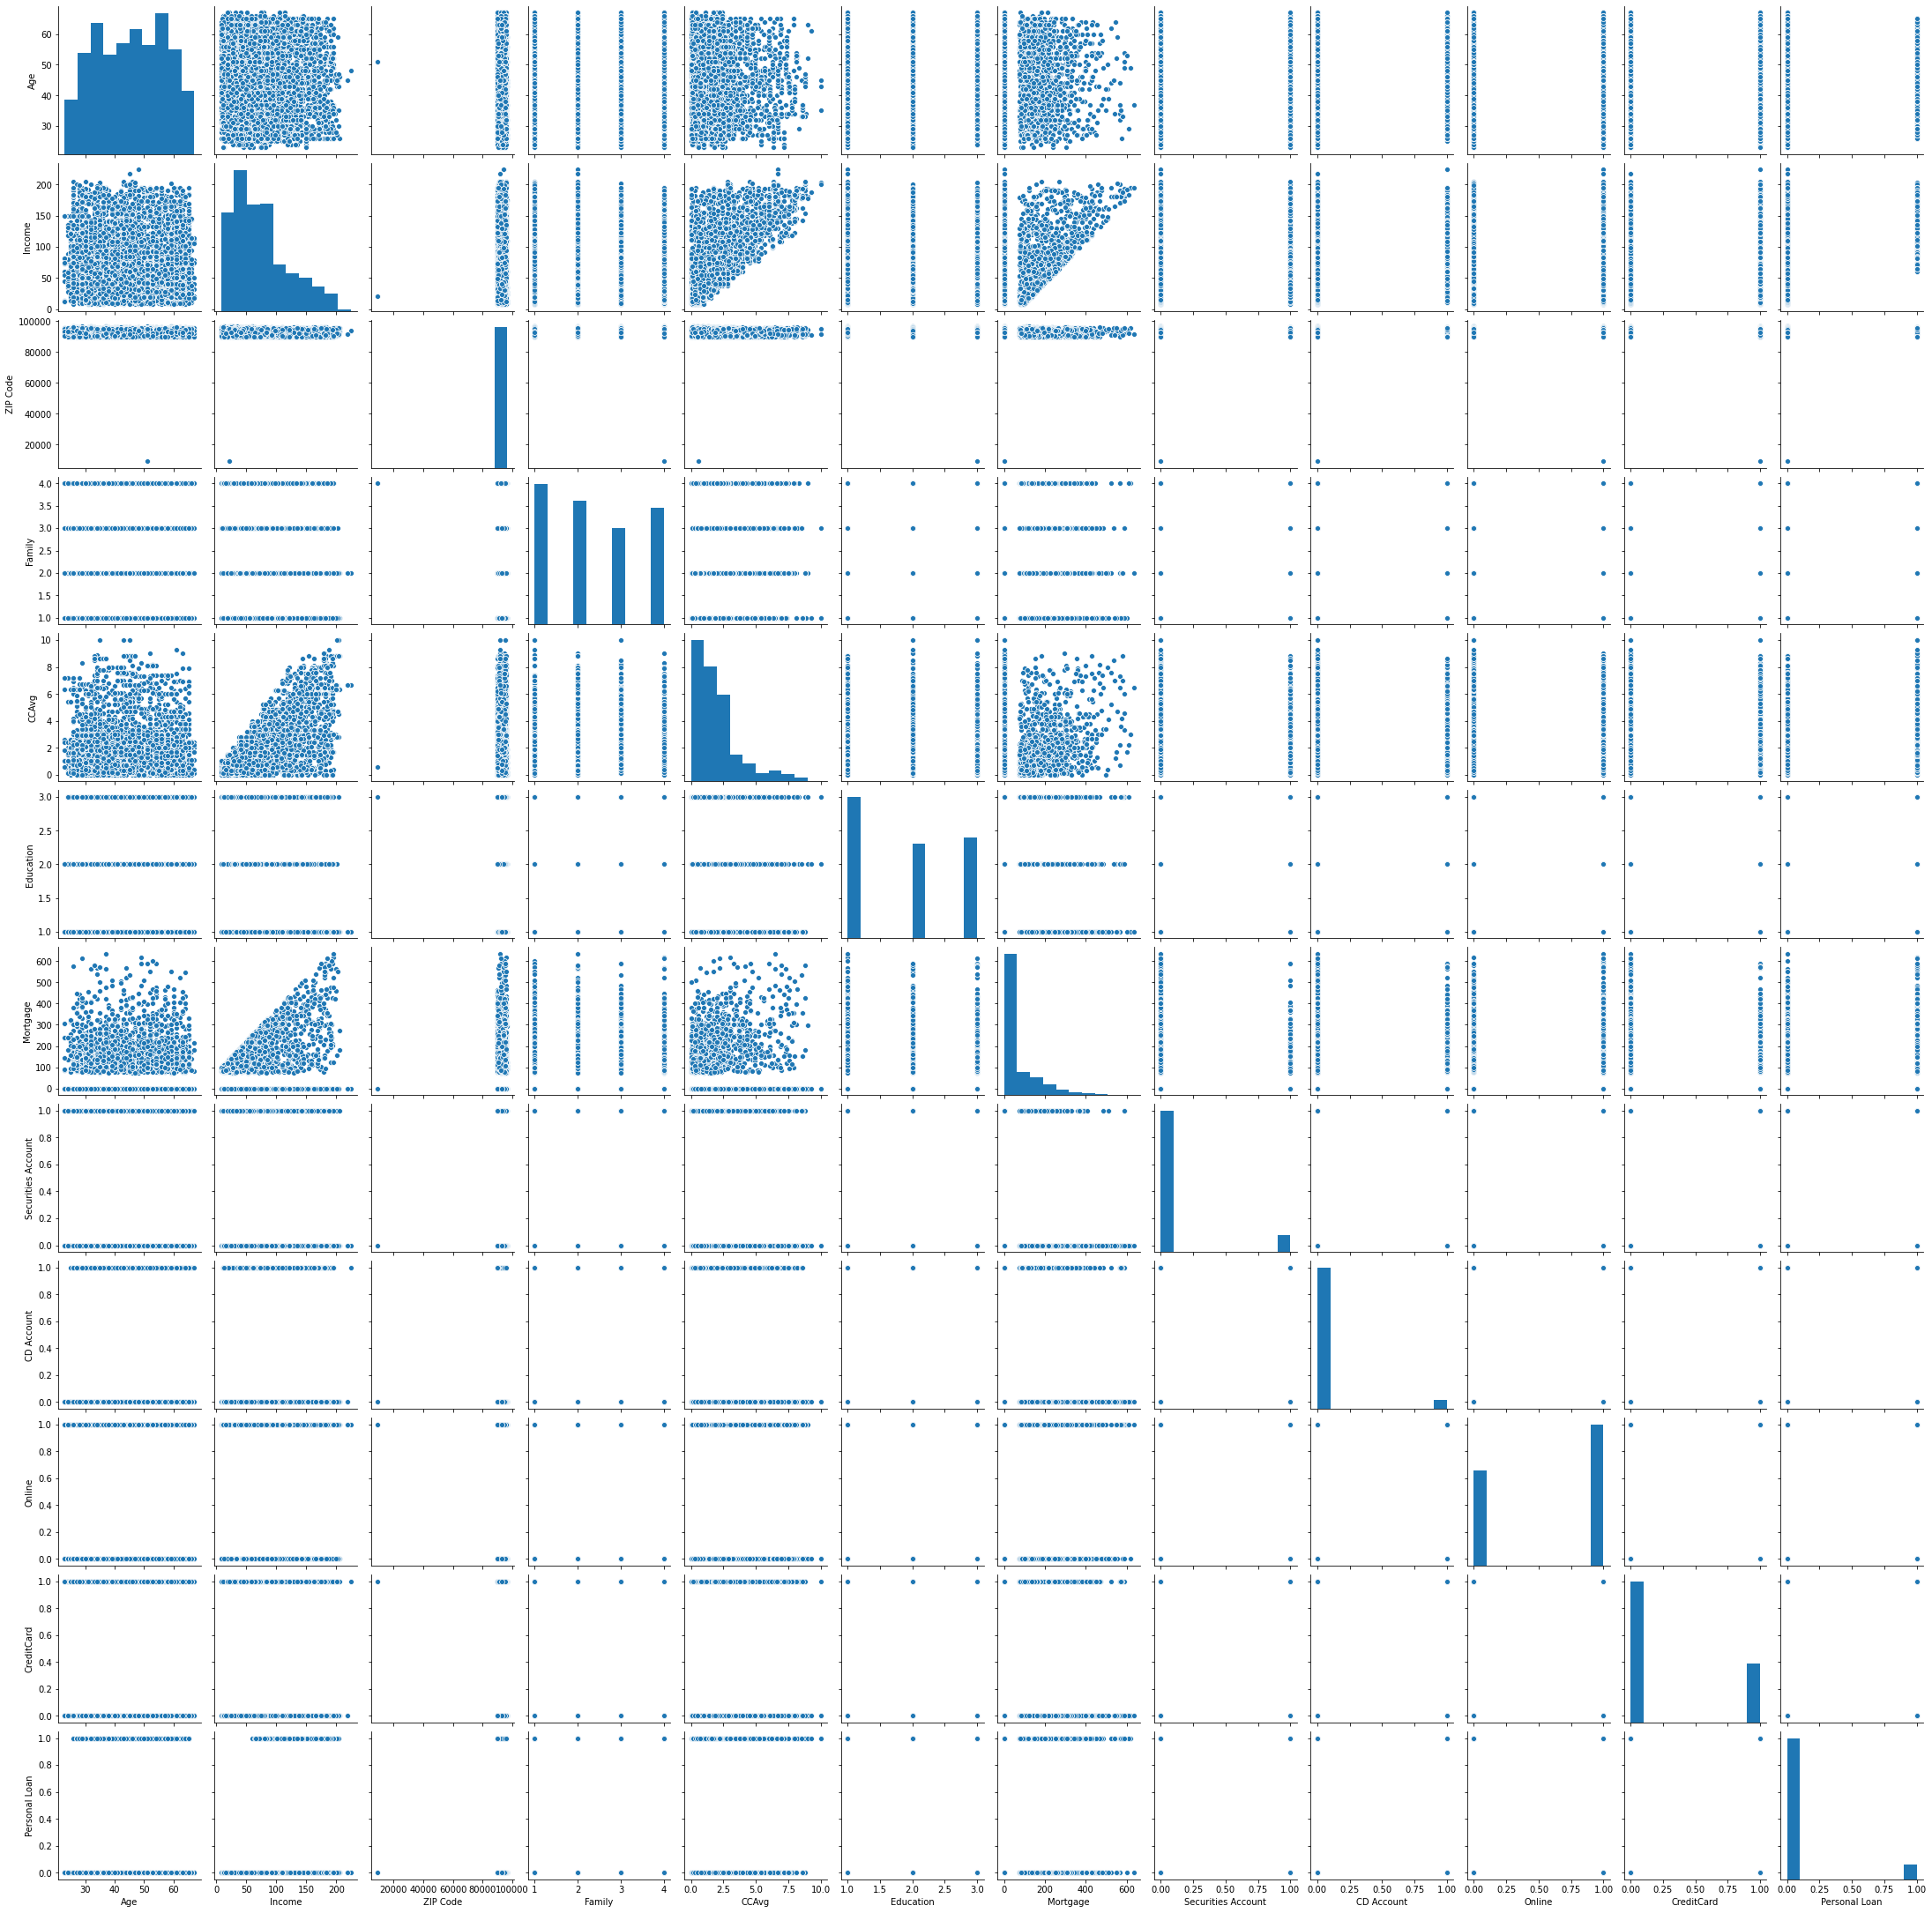

In [182]:
sns.pairplot(dataset)

In [183]:
data_X=dataset.drop("Personal Loan",axis=1)
data_Y=dataset[["Personal Loan"]]

**Power Transformation**

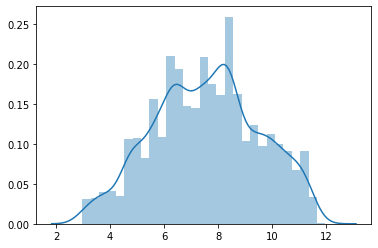

In [184]:
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data_X["Income"].values.reshape(-1,1))
temp=pt.transform(data_X["Income"].values.reshape(-1,1))
sns.distplot(temp);

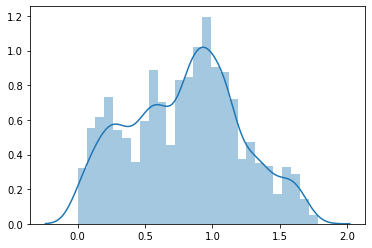

In [185]:
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data_X["CCAvg"].values.reshape(-1,1))
temp=pt.transform(data_X["CCAvg"].values.reshape(-1,1))
sns.distplot(temp);

In [186]:
data_X["Mortgage_Int"]=pd.cut(data_X["Mortgage"],
                              bins=[0,100,200,300,400,500,600,700],
                              labels=[0,1,2,3,4,5,6],
                              include_lowest=True)
data_X.drop("Mortgage",axis=1, inplace= True)

In [187]:
data_X.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,49,91107,4,1.6,1,1,0,0,0,0
1,45,34,90089,3,1.5,1,1,0,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,1,0


***Splitting the data to train data and test data in  70:30 ratio ***

In [188]:
train_X,test_X,train_Y,test_Y =train_test_split(data_X,data_Y,test_size=0.3,stratify=data_Y,random_state=True)

In [189]:
print(train_X.shape,train_Y.shape,test_X.shape,test_Y.shape)

(3500, 11) (3500, 1) (1500, 11) (1500, 1)


**LOGISTIC REGRESSION**

In [190]:
model1=LogisticRegression()
model1.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [191]:
model_prediction1=model1.predict(train_X)
model_prediction2=model1.predict(test_X)

In [192]:
a1=metrics.accuracy_score(train_Y,model_prediction1)
a2=metrics.accuracy_score(test_Y,model_prediction2)
print("Accuracy_score of train dataset: ",a1 )
print("Accuracy_score of test dataset: ",a2)

Accuracy_score of train dataset:  0.9105714285714286
Accuracy_score of test dataset:  0.9013333333333333


In [193]:
print('\nLogistic Regression classification Report : \n',metrics.classification_report(test_Y, model_prediction2))


Logistic Regression classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1356
           1       0.48      0.30      0.37       144

    accuracy                           0.90      1500
   macro avg       0.70      0.63      0.66      1500
weighted avg       0.89      0.90      0.89      1500



CONFUSION MATRIX
[[1309   47]
 [ 101   43]]


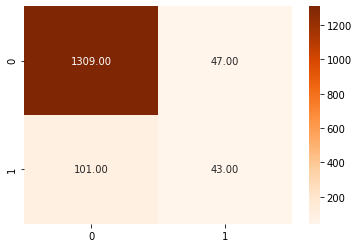

In [194]:
print('CONFUSION MATRIX');
print(confusion_matrix(test_Y,model_prediction2))
sns.heatmap(confusion_matrix(test_Y,model_prediction2),cmap='Oranges',annot=True,fmt='.2f')

In [195]:
print("ReCall:",recall_score(test_Y,model_prediction2))
print("\nPrecision:",precision_score(test_Y,model_prediction2))
print("\nF1 Score:",f1_score(test_Y,model_prediction2))
print("\nRoc Auc Score:",roc_auc_score(test_Y,model_prediction2))

ReCall: 0.2986111111111111

Precision: 0.4777777777777778

F1 Score: 0.36752136752136755

Roc Auc Score: 0.6319751720747296


 KNN Classifier 

Odd Neighbors : 
 [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

Accuracy Score : 
 [0.892, 0.9033333333333333, 0.9106666666666666, 0.9046666666666666, 0.9053333333333333, 0.9046666666666666, 0.904, 0.904, 0.902, 0.9053333333333333]

Misclassification error :
 [0.10799999999999998, 0.09666666666666668, 0.08933333333333338, 0.09533333333333338, 0.09466666666666668, 0.09533333333333338, 0.09599999999999997, 0.09599999999999997, 0.09799999999999998, 0.09466666666666668]

The optimal number of neighbor is k= 5


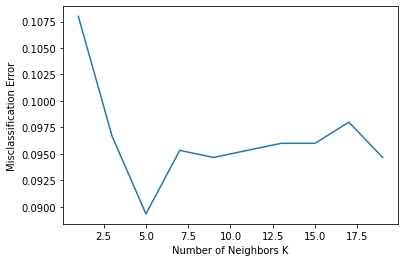

In [196]:
numberList = list(range(1,20))
neighbors = list(filter(lambda x: x % 2 != 0 , numberList))

ac_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_Y.values.ravel())               
    y_pred = knn.predict(test_X)
    scores = accuracy_score(test_Y, y_pred)
    ac_scores.append(scores)                

MSE = [1 - x for x in ac_scores]

optimal_k = neighbors[MSE.index(min(MSE))]

print('Odd Neighbors : \n', neighbors)
print('\nAccuracy Score : \n', ac_scores)
print('\nMisclassification error :\n', MSE)
print("\nThe optimal number of neighbor is k=",optimal_k)

plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [197]:
model2 = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
model2.fit(train_X, train_Y)
knn_train=model2.predict(train_X)
knn_test = model2.predict(test_X)
knn_acc1= accuracy_score(train_Y,knn_train)
knn_acc2 = accuracy_score(test_Y, knn_test)
print("Accuracy of train dataset using KNN model: ",knn_acc1)
print("Accuracy of test dataset using KNN model:",knn_acc2)

Accuracy of train dataset using KNN model:  0.9314285714285714
Accuracy of test dataset using KNN model: 0.9106666666666666


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [198]:
print('\nK-NN classification Report : \n',metrics.classification_report(test_Y,knn_test))


K-NN classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1356
           1       0.55      0.35      0.43       144

    accuracy                           0.91      1500
   macro avg       0.74      0.66      0.69      1500
weighted avg       0.90      0.91      0.90      1500



CONFUSION MATRIX
[[1315   41]
 [  93   51]]


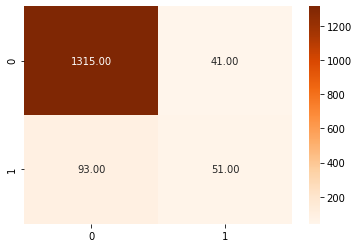

In [199]:
print('CONFUSION MATRIX');
print(confusion_matrix(test_Y,knn_test))
sns.heatmap(confusion_matrix(test_Y,knn_test),cmap='Oranges',annot=True,fmt='.2f')

In [200]:
print("ReCall:",recall_score(test_Y,knn_test))
print("\nPrecision:",precision_score(test_Y,knn_test))
print("\nF1 Score:",f1_score(test_Y,knn_test))
print("\nRoc Auc Score:",roc_auc_score(test_Y,knn_test))

ReCall: 0.3541666666666667

Precision: 0.5543478260869565

F1 Score: 0.4322033898305085

Roc Auc Score: 0.6619653392330384


**DECISIONTREE CLASSIFIER**

In [201]:
model3=DecisionTreeClassifier(random_state=0, max_depth=8)
model3.fit(train_X,train_Y)
predict_train = model3.predict(train_X)
predict_test = model3.predict(test_X)
dtc_acc1 = accuracy_score(train_Y,predict_train)
dtc_acc2= accuracy_score(test_Y,predict_test)
print("Accuracy of train dataset using decisiontree classifier :",dtc_acc1)
print("Accuracy of test datadset using decisiontree classifier: ",dtc_acc2)

Accuracy of train dataset using decisiontree classifier : 0.9968571428571429
Accuracy of test datadset using decisiontree classifier:  0.9806666666666667


In [202]:
print('\nDecisionTree  classification Report : \n',metrics.classification_report(test_Y,predict_test))


DecisionTree  classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.92      0.88      0.90       144

    accuracy                           0.98      1500
   macro avg       0.95      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



CONFUSION MATRIX
[[1345   11]
 [  18  126]]


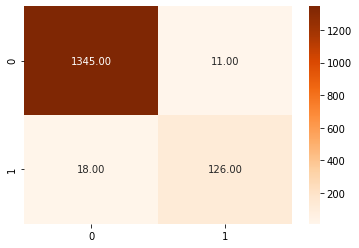

In [203]:
print('CONFUSION MATRIX');
print(confusion_matrix(test_Y,predict_test))
sns.heatmap(confusion_matrix(test_Y,predict_test),cmap='Oranges',annot=True,fmt='.2f')

In [204]:
print("ReCall:",recall_score(test_Y,predict_test))
print("\nPrecision:",precision_score(test_Y,predict_test))
print("\nF1 Score:",f1_score(test_Y,predict_test))
print("\nRoc Auc Score:",roc_auc_score(test_Y,predict_test))

ReCall: 0.875

Precision: 0.9197080291970803

F1 Score: 0.896797153024911

Roc Auc Score: 0.9334439528023598


**Final Conclusion**

*  From the above, we can clearly see that DecisionTree Classifier model gives us best accuracy of 98%.

*  Also the Type I(False Posssitive) and Type II(False Negative) errors are least in DecisionTree Classifier model.

*  Also Roc Curve of DecisionTree Classifier is 0.93 which is closer to 1 than Logistic Regression and Knn Classifier.

*  It is concluded that among the three above model on this particular dataset, DecisionTree Classifier would be the best choice to predict the customers who will accept personal loans.







